In [98]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# File to Load (Remember to change these)
city_data_to_load = "data/city_data.csv"
ride_data_to_load = "data/ride_data.csv"

In [99]:
#read the city df
city_df = pd.read_csv(city_data_to_load)
city_df.head()

,city,driver_count,type
0,Richardfort,38,Urban
1,Williamsstad,59,Urban
2,Port Angela,67,Urban
3,Rodneyfort,34,Urban
4,West Robert,39,Urban


In [100]:
#read the ride df
ride_df = pd.read_csv(ride_data_to_load)
ride_df.head()

,city,date,fare,ride_id
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873
1,South Michelleport,2018-03-04 18:24:09,30.24,2343912425577
2,Port Samanthamouth,2018-02-24 04:29:00,33.44,2005065760003
3,Rodneyfort,2018-02-10 23:22:03,23.44,5149245426178
4,South Jack,2018-03-06 04:28:35,34.58,3908451377344


In [101]:
#merge both of them together
merge_df = pd.merge(ride_df, city_df, on = "city", how = "left")
merge_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2018-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2018-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2018-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2018-03-06 04:28:35,34.58,3908451377344,46,Urban


## Bubble Plot of Ride Sharing Data

In [102]:
#group df by type and city
citygrouped_df = merge_df.groupby(["type","city"])

In [103]:
#calculate averages segregated by type and city
fareaverage = citygrouped_df["fare"].mean()
fareaverage.head()

type   city          
Rural  Bradshawfurt      40.064000
       Garzaport         24.123333
       Harringtonfort    33.470000
       Jessicaport       36.013333
       Lake Jamie        34.358333
Name: fare, dtype: float64

In [104]:
#calculate averages segregated by type and city. Number should be the same as the original df.
drivercount = citygrouped_df["driver_count"].mean()
drivercount.head()

type   city          
Rural  Bradshawfurt      7
       Garzaport         7
       Harringtonfort    4
       Jessicaport       1
       Lake Jamie        4
Name: driver_count, dtype: int64

In [105]:
#count number of rides that occurred segregated by type and city
ridecount = citygrouped_df["ride_id"].count()
ridecount.head()

type   city          
Rural  Bradshawfurt      10
       Garzaport          3
       Harringtonfort     6
       Jessicaport        6
       Lake Jamie         6
Name: ride_id, dtype: int64

In [106]:
#create a new dataframe with the groupby
ride_df = pd.DataFrame({"Total Rides": ridecount, "Average Fare": fareaverage, "Total Drivers": drivercount})
ride_df.head()

Total Rides  Average Fare  Total Drivers
type  city                                                    
Rural Bradshawfurt             10     40.064000              7
      Garzaport                 3     24.123333              7
      Harringtonfort            6     33.470000              4
      Jessicaport               6     36.013333              1
      Lake Jamie                6     34.358333              4

In [107]:
#create groups for rural
g1variable = "Rural"
g1 = ride_df.loc[g1variable]
g1.head()

,Total Rides,Average Fare,Total Drivers
city,,,
Bradshawfurt,10,40.064000,7
Garzaport,3,24.123333,7
Harringtonfort,6,33.470000,4
Jessicaport,6,36.013333,1
Lake Jamie,6,34.358333,4


In [108]:
#create groups for urban
g2variable = "Urban"
g2 = ride_df.loc[g2variable]
g2.head()

,Total Rides,Average Fare,Total Drivers
city,,,
Amandaburgh,18,24.641667,12
Barajasview,22,25.332273,26
Carriemouth,27,28.314444,52
Christopherfurt,27,24.501852,41
Deanville,19,25.842632,49


In [109]:
#create groups for suburban
g3variable = "Suburban"
g3 = ride_df.loc[g3variable]
g3.head()

,Total Rides,Average Fare,Total Drivers
city,,,
Barronchester,16,36.422500,11
Bethanyland,18,32.956111,22
Brandonfort,19,35.437368,10
Colemanland,22,30.894545,23
Davidfurt,17,31.995882,23


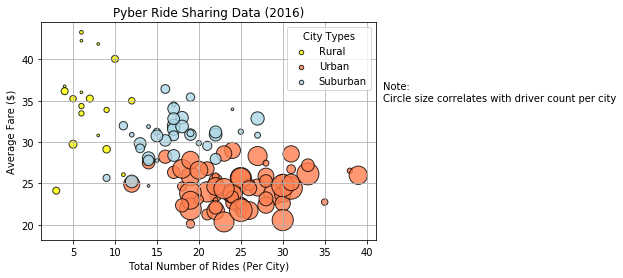

In [110]:
#plot data points by groups, label them
plt.scatter(g1["Total Rides"],g1["Average Fare"], marker="o", facecolors= "yellow", edgecolors="black", s=g1["Total Drivers"]*7, alpha = .8, label = "Rural")
plt.scatter(g2["Total Rides"],g2["Average Fare"], marker="o", facecolors= "coral", edgecolors="black", s=g2["Total Drivers"]*7, alpha = .8, label = "Urban")
plt.scatter(g3["Total Rides"],g3["Average Fare"], marker="o", facecolors= "lightblue", edgecolors="black", s=g3["Total Drivers"]*7, alpha = .8, label = "Suburban")
#add a grid
plt.grid()
#add titles and x and y axes
plt.title("Pyber Ride Sharing Data (2016)")
plt.xlabel("Total Number of Rides (Per City)")
plt.ylabel("Average Fare ($)")
#add legend and change the size of the legend
lgnd = plt.legend(title = "City Types",loc = "upper right")
lgnd.legendHandles[0]._sizes = [20]
lgnd.legendHandles[1]._sizes = [20]
lgnd.legendHandles[2]._sizes = [20]
#add a note on the side
plt.text(42,35,"Note: \nCircle size correlates with driver count per city")

plt.savefig("PyberScatter.png", bbox_inches="tight")

In [94]:
plt.show()

## Total Fares by City Type

In [111]:
#recall merge_df for view
merge_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2018-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2018-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2018-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2018-03-06 04:28:35,34.58,3908451377344,46,Urban


In [112]:
#create a new dataframe to look at fare specific info
fares_df = merge_df[["city", "fare", "type"]]
fares_df.head()

,city,fare,type
0,Lake Jonathanshire,13.83,Urban
1,South Michelleport,30.24,Urban
2,Port Samanthamouth,33.44,Urban
3,Rodneyfort,23.44,Urban
4,South Jack,34.58,Urban


In [113]:
#caculcate total fares
aggfarestotal = fares_df["fare"].sum()
aggfarestotal

63538.64

In [114]:
#group the fares by type
faresgroup = fares_df.groupby("type")

In [115]:
#calculate the sum by type
farestotal = faresgroup["fare"].sum()
farestotal

type
Rural        4327.93
Suburban    19356.33
Urban       39854.38
Name: fare, dtype: float64

In [116]:
#calculate percentages
faresperc = (farestotal/aggfarestotal)*100
faresperc

type
Rural        6.811493
Suburban    30.463872
Urban       62.724635
Name: fare, dtype: float64

In [117]:
#create pie chart and plot
pielabels_1 = ["Rural", "Suburban", "Urban"]
piesizes_1 = [farestotal[0], farestotal[1], farestotal[2]]
colors = ["gold", "skyblue", "salmon"]
explode = (0,0,0.1)

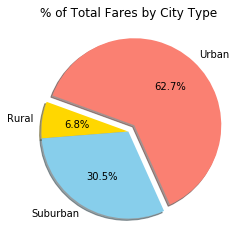

In [118]:
#plot and add title
plt.title("% of Total Fares by City Type")
plt.pie(piesizes_1, explode = explode, labels = pielabels_1, colors = colors, autopct = "%1.1f%%", shadow = True, startangle = 160)
plt.savefig("FaresByCity.png", bbox_inches="tight")

In [ ]:
plt.show()

## Total Rides by City Type

In [22]:
#recall merge_df for view
merge_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2018-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2018-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2018-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2018-03-06 04:28:35,34.58,3908451377344,46,Urban


In [23]:
#select pertinent ride information
rides_df = merge_df[["ride_id", "type"]]
rides_df.head()

,ride_id,type
0,5739410935873,Urban
1,2343912425577,Urban
2,2005065760003,Urban
3,5149245426178,Urban
4,3908451377344,Urban


In [24]:
#group this data by type
ridesgroup = rides_df.groupby("type")

In [25]:
#calculate total rides that occured from the original  df
aggridestotal = rides_df["ride_id"].count()
aggridestotal

2375

In [26]:
#segregate count by type
ridestotal = ridesgroup["ride_id"].count()
ridestotal

type
Rural        125
Suburban     625
Urban       1625
Name: ride_id, dtype: int64

In [27]:
#calculate the percentage
ridesperc = (ridestotal/aggridestotal)*100
ridesperc

type
Rural        5.263158
Suburban    26.315789
Urban       68.421053
Name: ride_id, dtype: float64

In [28]:
#create pie chart
pielabels_1 = ["Rural", "Suburban", "Urban"]
piesizes_2 = [ridestotal[0], ridestotal[1], ridestotal[2]]
colors = ["gold", "skyblue", "salmon"]
explode = (0,0,0.1)

([<matplotlib.patches.Wedge at 0x296e4ccfa90>,
 [Text(-0.8361183562094461, 0.7147769543078554, 'Rural'),
  Text(-1.0557006909648146, -0.3090243535652377, 'Suburban'),
  Text(1.1914538589429322, 0.14296049108056377, 'Urban')],
 [Text(-0.45606455793242506, 0.3898783387133756, '5.3%'),
  Text(-0.5758367405262624, -0.16855873830831145, '26.3%'),
  Text(0.6950147510500436, 0.08339361979699553, '68.4%')])

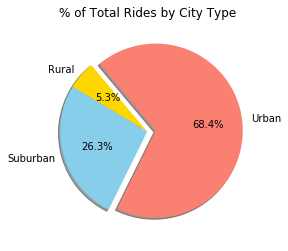

In [29]:
#add labels and plot
plt.title("% of Total Rides by City Type")
plt.pie(piesizes_2, explode = explode, labels = pielabels_1, colors = colors, autopct = "%1.1f%%", shadow = True, startangle = 130)
plt.savefig("RidesByCity.png", bbox_inches="tight")

In [ ]:
plt.show()

## Total Drivers by City Type

In [30]:
#recall merge_df for view
merge_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2018-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2018-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2018-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2018-03-06 04:28:35,34.58,3908451377344,46,Urban


In [31]:
#select pertinent data for view
driver_df = merge_df[["city", "driver_count", "type"]]
driver_df.head()

,city,driver_count,type
0,Lake Jonathanshire,5,Urban
1,South Michelleport,72,Urban
2,Port Samanthamouth,57,Urban
3,Rodneyfort,34,Urban
4,South Jack,46,Urban


In [32]:
#calculate uniques by dropping any duplicates
uniquedrivers = driver_df.drop_duplicates()
uniquedrivers.head()

,city,driver_count,type
0,Lake Jonathanshire,5,Urban
1,South Michelleport,72,Urban
2,Port Samanthamouth,57,Urban
3,Rodneyfort,34,Urban
4,South Jack,46,Urban


In [33]:
#create a group by
driverbytype_df = uniquedrivers.groupby('type')

In [34]:
#total driver count segregated by type
totaldrivers = driverbytype_df['driver_count'].sum()
totaldrivers

type
Rural         78
Suburban     490
Urban       2405
Name: driver_count, dtype: int64

In [35]:
#create pie chart
pielabels_1 = ["Rural", "Suburban", "Urban"]
piesizes_2 = [totaldrivers[0], totaldrivers[1], totaldrivers[2]]
colors = ["gold", "skyblue", "salmon"]
explode = (0,0,0.1)

([<matplotlib.patches.Wedge at 0x296e4d18ac8>,
 [Text(-1.0611270755075652, 0.28984362960872906, 'Rural'),
  Text(-1.0393683527182622, -0.36015750355605003, 'Suburban'),
  Text(1.1623544340130285, 0.2982149723442008, 'Urban')],
 [Text(-0.57879658664049, 0.15809652524112494, '2.6%'),
  Text(-0.5669281923917793, -0.19644954739420908, '16.5%'),
  Text(0.6780400865075998, 0.17395873386745045, '80.9%')])

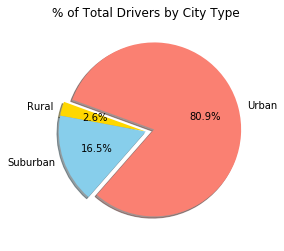

In [36]:
#create title and plot
plt.title("% of Total Drivers by City Type")
plt.pie(piesizes_2, explode = explode, labels = pielabels_1, colors = colors, autopct = "%1.1f%%", shadow = True, startangle = 160)
plt.savefig("DriversByCity.png", bbox_inches="tight")

In [ ]:
plt